# **Welcome To the Notebook** 


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import math

### **Task 1 - Loading our data**



Loading our data

In [4]:
import pandas as pd
data=pd.read_csv('ChurnData.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Print the data schema to check out the data types

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].isna().sum()

np.int64(11)

In [15]:
data[data['TotalCharges'].isna()]['tenure']

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

## There are 11 rows in Total Charges as NaN, but these are the customers who are totally new - we can set them to zero

### **Task 2 - Exploratory Data Analysis**
- Distribution Analysis
- Correlation Analysis 
- Univariate Analysis 
- Finding Missing values

Let's define some lists to store different column names with different data types.

Let's get all the numerical features and store them into a pandas dataframe.

Let's create histograms to analyse the distribution of our numerical columns. 

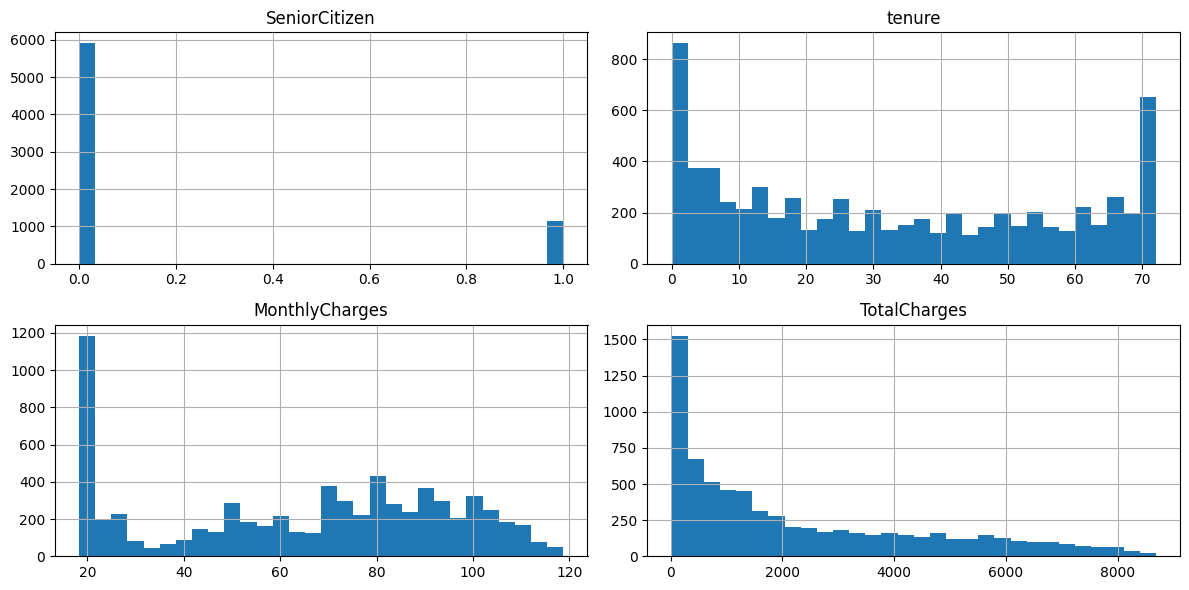

In [46]:
num_columns=data.select_dtypes(exclude= 'object')
num_columns.hist(bins=30, figsize=(12,6))
plt.tight_layout()
plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

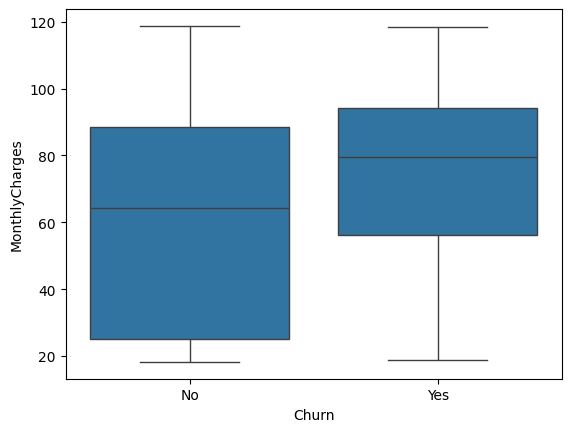

In [47]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)

### The median monthly charge is higher for churned customers. While the ranges for both yes and no are the same, the IQR for yes is way lower, that is, Churned customers pay a monthly charge in a concentrated, high range of values

<Axes: xlabel='Churn', ylabel='TotalCharges'>

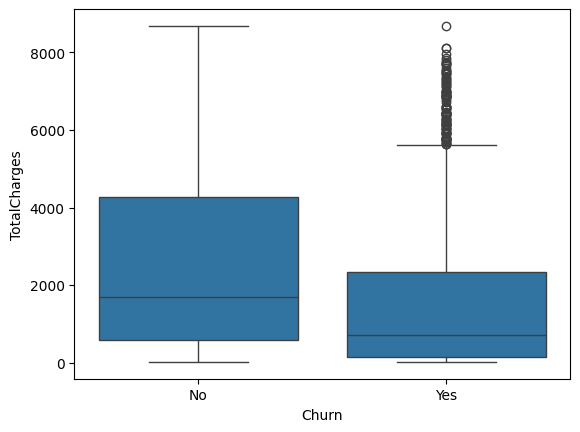

In [50]:
sns.boxplot(x='Churn',y='TotalCharges', data=data)

<Axes: xlabel='Churn', ylabel='tenure'>

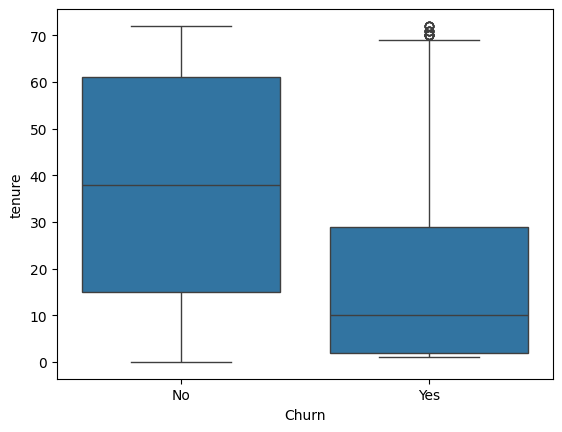

In [49]:
sns.boxplot(x='Churn',y='tenure', data=data)

### Some outliers, corresponding to people who stayed for long but ultimately left. We will keep them for now

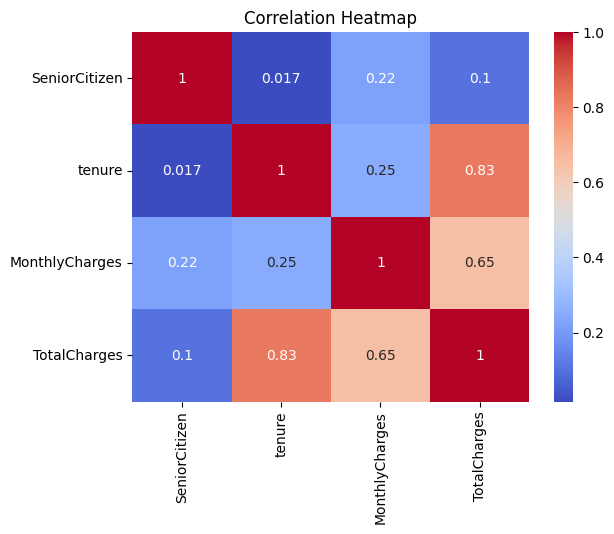

In [52]:
sns.heatmap(num_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [104]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Encode the target if needed
data['Churn_encoded'] = LabelEncoder().fit_transform(data['Churn'])

# Select categorical features (excluding ID and original target)
categorical_cols = data.select_dtypes(include='object').columns.drop(['customerID', 'Churn'])

# Calculate Cramér's V for each categorical feature against Churn
cramers_v_scores = {}
for col in categorical_cols:
    confusion_mat = pd.crosstab(data[col], data['Churn_encoded'])
    cramers_v_scores[col] = round(cramers_v(confusion_mat), 3)

# Display sorted results
cramers_v_df = pd.DataFrame.from_dict(cramers_v_scores, orient='index', columns=['CramersV_with_Churn'])
cramers_v_df = cramers_v_df.sort_values(by='CramersV_with_Churn', ascending=False)

print(cramers_v_df)


                  CramersV_with_Churn
Contract                        0.410
OnlineSecurity                  0.347
TechSupport                     0.343
InternetService                 0.322
PaymentMethod                   0.303
OnlineBackup                    0.292
DeviceProtection                0.282
StreamingMovies                 0.231
StreamingTV                     0.231
PaperlessBilling                0.191
Dependents                      0.164
Partner                         0.150
MultipleLines                   0.040
PhoneService                    0.011
gender                          0.008


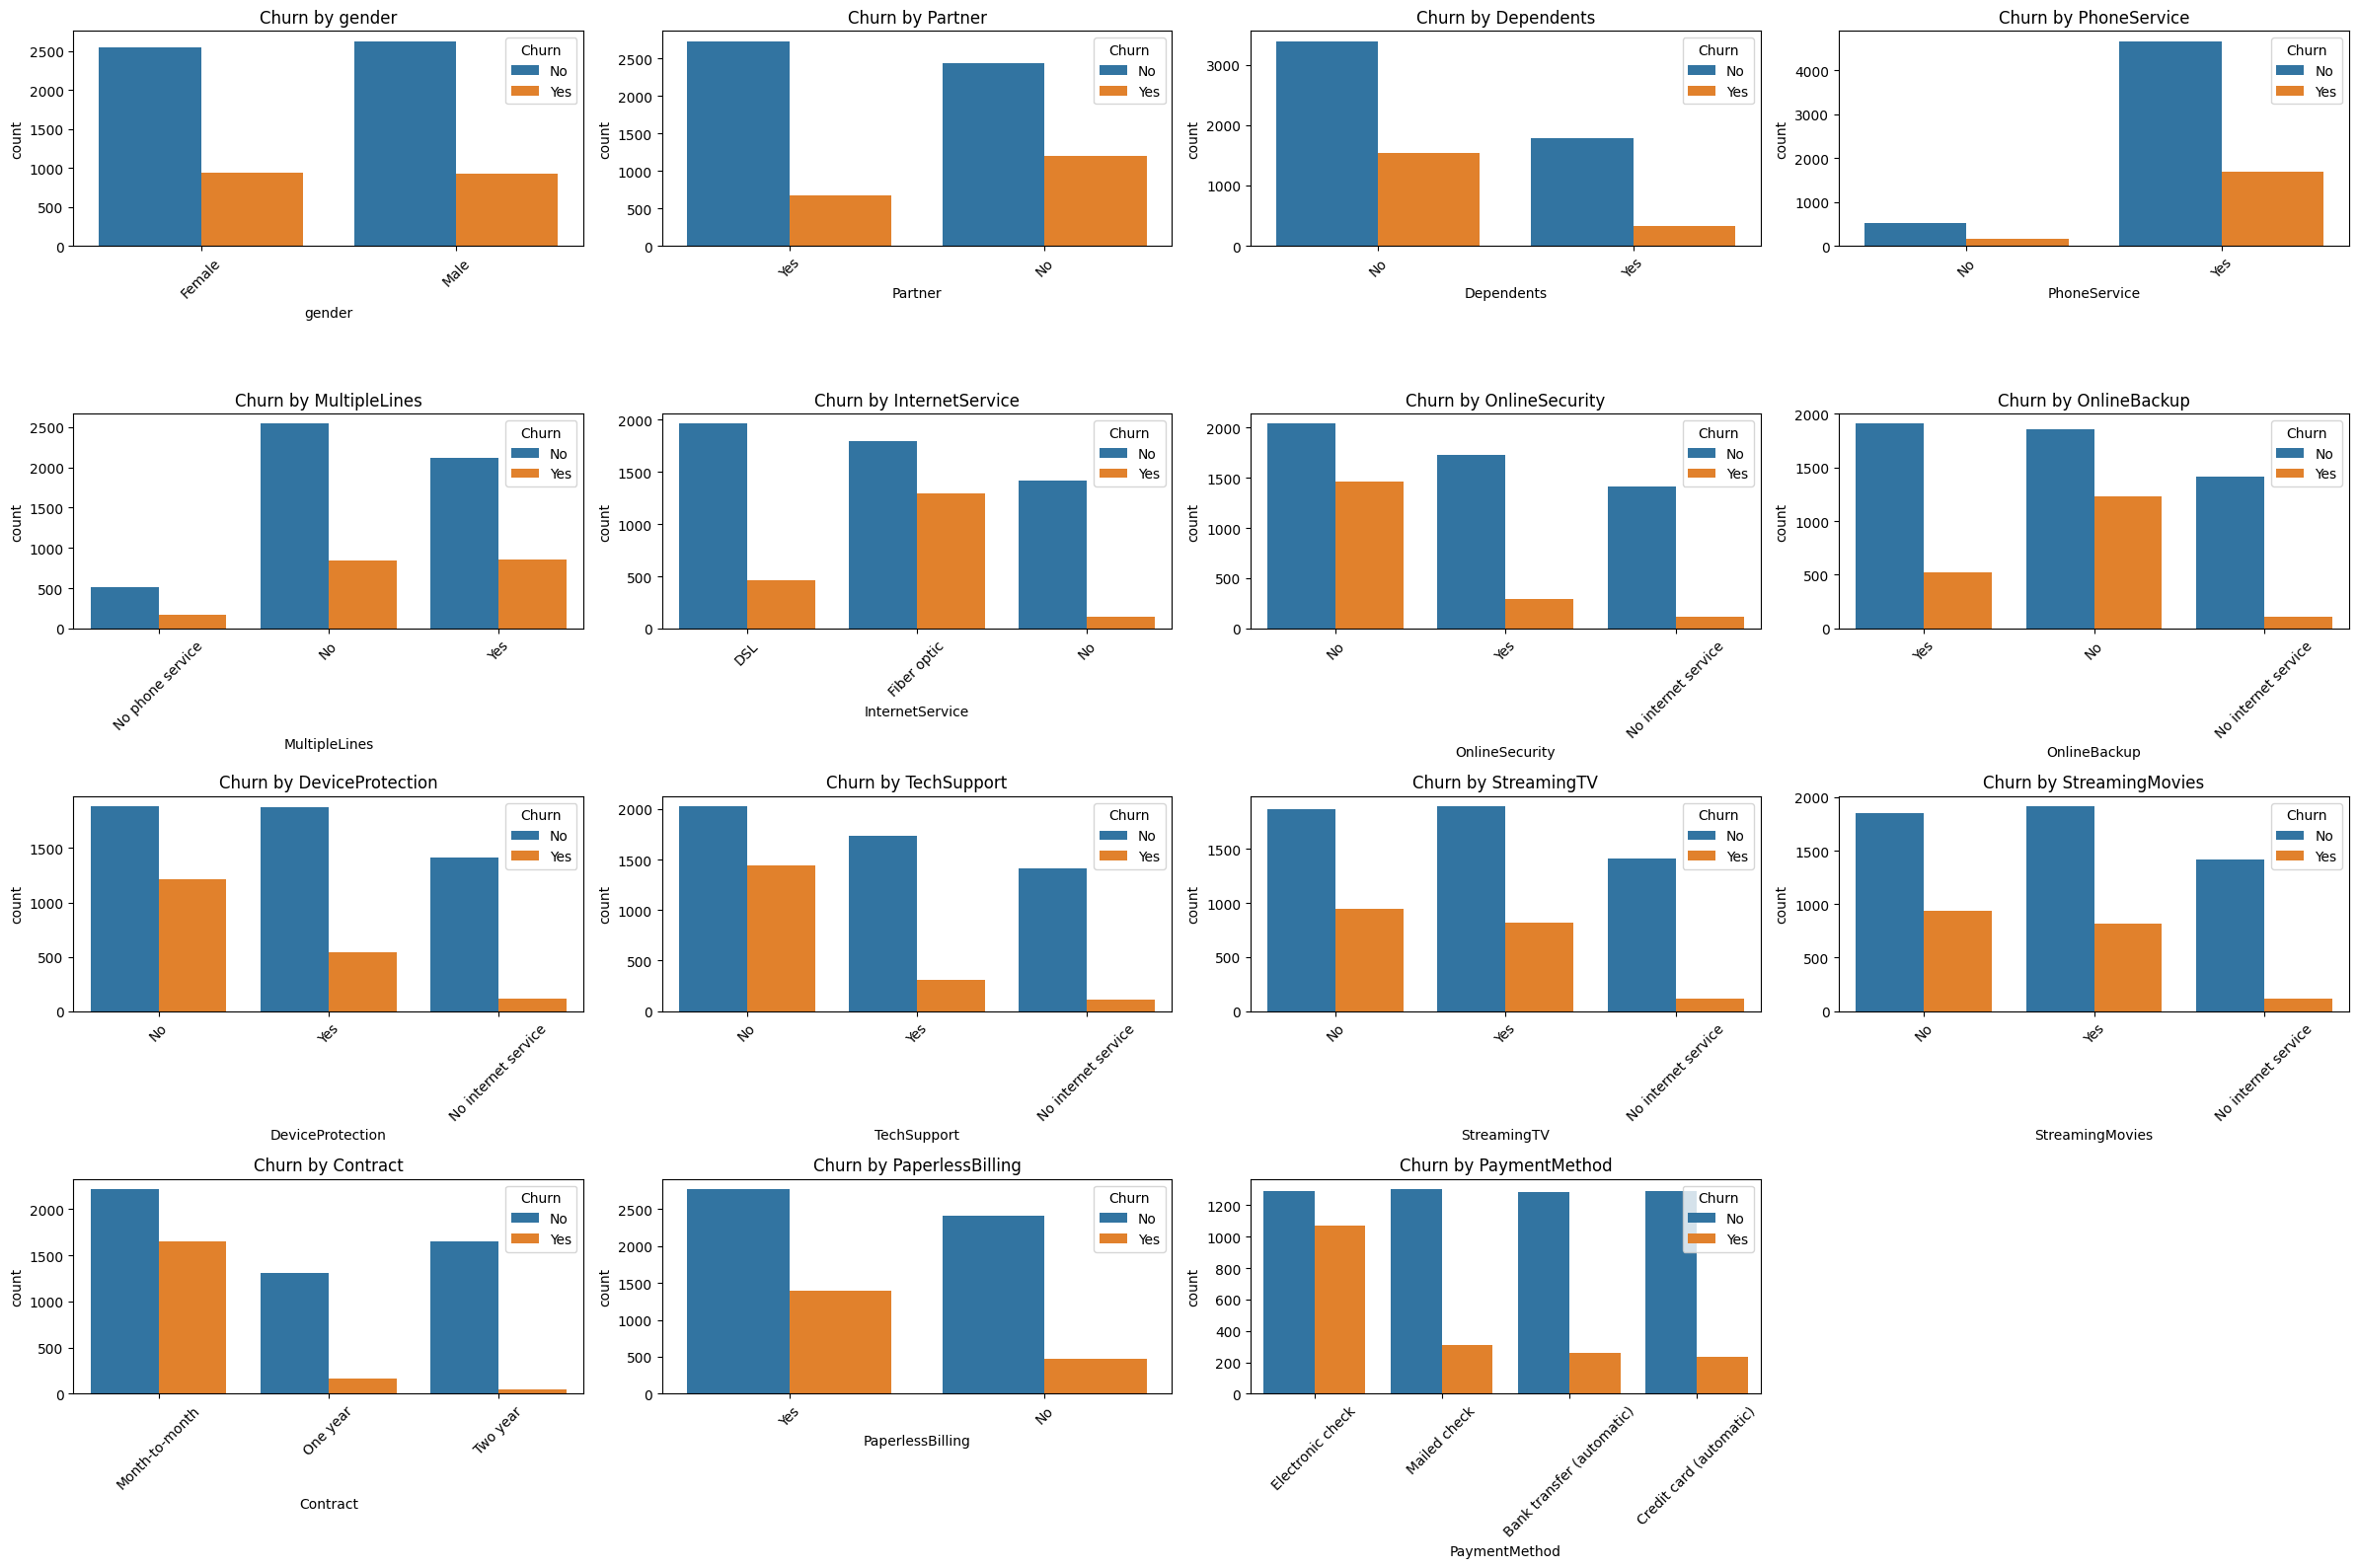

In [70]:
# Create count plots for each categorical feature vs Churn
n_cols = 4  # You can adjust this
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Set up the matplotlib grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

# Loop through each categorical column and create a countplot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Churn', data=data, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### **Task 3 - Data Preprocessing**
- Handling the missing values
- Removing the outliers

In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Creating our Imputer

In [17]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
data['TotalCharges']=data['TotalCharges'].fillna(value=0)
data['TotalCharges'].isnull().sum()

np.int64(0)

In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
categorical_cols=data.select_dtypes('object').columns
data[categorical_cols].nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

In [23]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

y=data['Churn']
X=pd.get_dummies(data.drop(['customerID','Churn'],axis=1), drop_first=True)
X.shape

(7043, 30)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
X_test.shape

(1409, 30)

### **Task 5 - Model Training**
- Train and Test data splitting 
- Creating our model 
- Training our model 
- Make initial predictions using our model

In this task, we are going to start training our model

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [38]:
models = {"LogisticRegression": LogisticRegression(max_iter=3000), "RandomForest": RandomForestClassifier(), "XGBoost": XGBClassifier(use_label_encoder=False,eval_metric='logloss'),
"SVM":SVC(probability=True),"KNN": KNeighborsClassifier()}

Let's make predictions on our test data

In [ ]:
from sklearn.metrics import accuracy_score

results={}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name]= acc


In [41]:
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


LogisticRegression: 0.8062
RandomForest: 0.7885
XGBoost: 0.7800
SVM: 0.7346
KNN: 0.7658


## The accuracies are totally unimpressive. We forgot to check something important - is the dataset balanced?

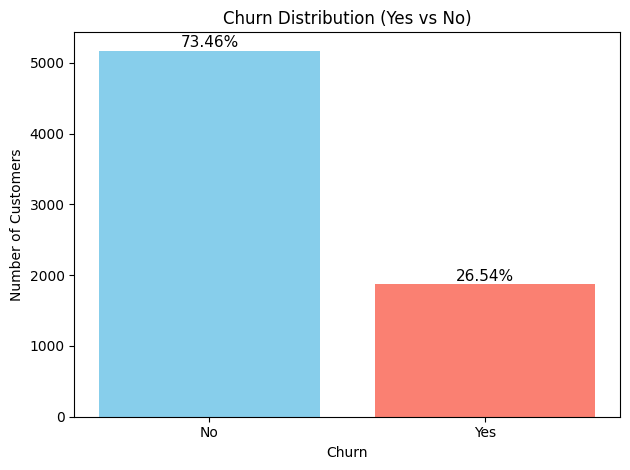

In [13]:
import matplotlib.pyplot as plt

# Count churn values
churn_counts = data['Churn'].value_counts()
total = churn_counts.sum()
percentages = (churn_counts / total * 100).round(2)

# Bar plot
fig, ax = plt.subplots()
bars = ax.bar(churn_counts.index.astype(str), churn_counts.values, color=['skyblue', 'salmon'])

# Add percentage labels
for bar, pct in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10, f'{pct}%', ha='center', va='bottom', fontsize=11)

# Titles and labels
ax.set_title('Churn Distribution (Yes vs No)')
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Churn')
plt.tight_layout()
plt.show()

## Quite unbalanced! A model that predicts No all the time will still be 73 % accurate!

In [ ]:
from xgboost import XGBClassifier
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
weight = neg / pos


xgb_model = XGBClassifier(scale_pos_weight=weight,use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


In [ ]:
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for class "1" (Churn)


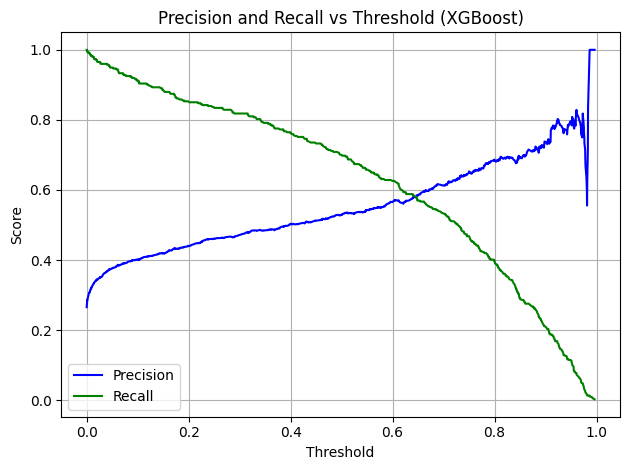

In [30]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold (XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
# 1. Choose a lower threshold (e.g., 0.35)
threshold = 0.65

# 2. Make predictions using that threshold
y_pred_thresh = (y_probs > threshold).astype(int)



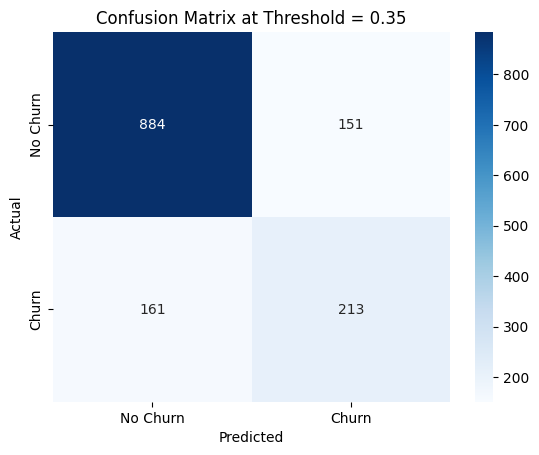

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix at Threshold = 0.35')
plt.show()


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)
f1 = f1_score(y_test, y_pred_thresh)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Precision: 0.5852
Recall:    0.5695
F1 Score:  0.5772


## Still seems unimpressive. Lets do a randomised CV search to get the best parameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)


In [44]:
print(search.best_params_)
print(search.best_score_)


{'colsample_bytree': np.float64(0.6481367528520412), 'learning_rate': np.float64(0.05958008171890075), 'max_depth': 3, 'n_estimators': 170, 'subsample': np.float64(0.7117007403531848)}
0.8482543126315572


In [13]:
best_params = {
    'n_estimators': 170,       
    'max_depth': 3,
    'learning_rate': 0.059,
    'subsample': 0.711,
    'colsample_bytree': 0.648
}

from xgboost import XGBClassifier

xgb_final = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    **best_params
)

xgb_final.fit(X_train, y_train)


C:\Users\manij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [22:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.648, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.059, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=170,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [14]:
y_probs = xgb_final.predict_proba(X_test)[:, 1]


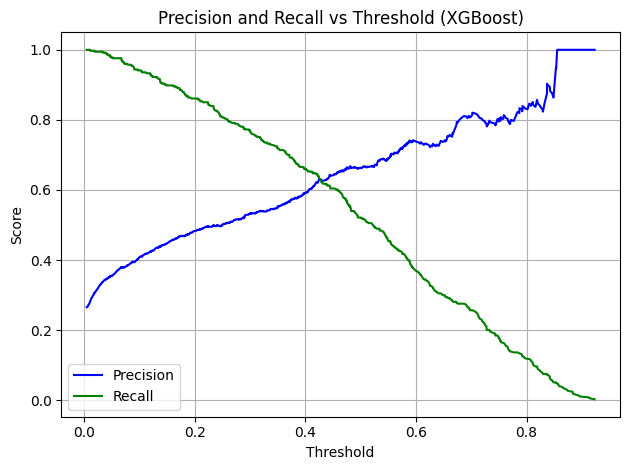

In [21]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold (XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

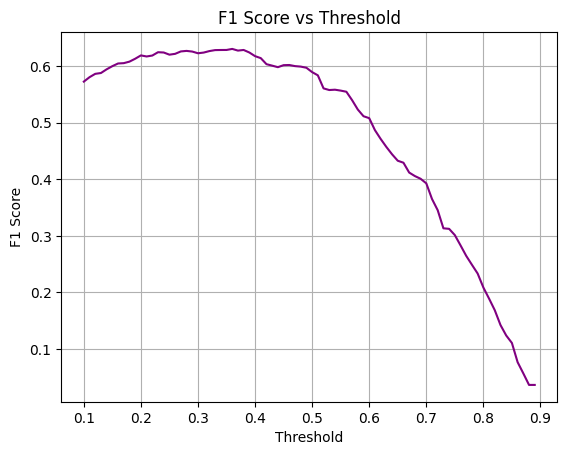

In [47]:
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, (y_probs >= t).astype(int)) for t in thresholds]

plt.plot(thresholds, f1_scores, color='purple')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.grid(True)
plt.show()


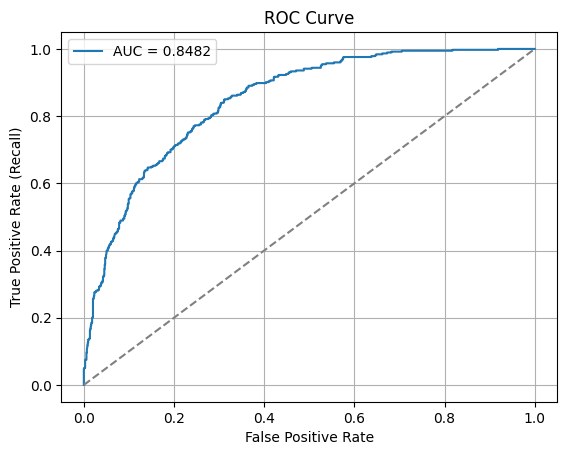

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities for the positive class
# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)

# Plot
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


[[835 200]
 [112 262]]


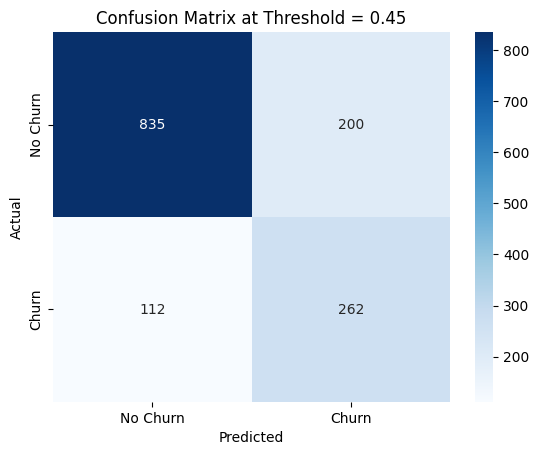

In [18]:
threshold = 0.37
from sklearn.metrics import confusion_matrix
import seaborn as sns
# 2. Make predictions using that threshold
y_pred_thresh = (y_probs > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_thresh)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix at Threshold = 0.45')
plt.show()

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_thresh)
recall = recall_score(y_test, y_pred_thresh)
f1 = f1_score(y_test, y_pred_thresh)

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Precision: 0.5671
Recall:    0.7005
F1 Score:  0.6268


## - The model correctly identifies 70% of actual churners!
## - Of all customers predicted to Churn, 56 % will actually churn
## (We prioritised recall over precision here, but the exact parameters can only be decided after considering business requirements)